# `Data Preprocessing`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt
from imblearn.over_sampling import RandomOverSampler

## Recap

### Data Preprocessing
1. Handle Missing Values:
    + Drop
    + Imputation
2. Handle Outliers:
    + Detection, Drop
      + Z-Score
      + IQR *
3. Scaling:
    - MinMax (0 -> 1)
    - StandardScaler (Mean= 0, Std= 1)
4. Encoding (Categorical Columns -> Numbers):
    - Features:
      - OneHotEncoder (Nominal)
      - OrdinalEncoder (Ordinal)
    - Label:
      - LabelEncoder
      - (OneHotEncoder)
5. Imbalancing:

------
Model Training:

# **1️⃣ Data Cleaning**

## **1.1 Handling missing value**

In [22]:
data = pd.DataFrame({
    'Age': [25, 30, None, 45, 50, None, 65],
    'Blood_press': [120, 130, 110, None, 140, 145, None],
    'choles': [200, None, 190, 210, None, 180, 200]
})
data

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,NaN,110.0,190.0
3,45.0,NaN,210.0
4,50.0,140.0,NaN
5,NaN,145.0,180.0
6,65.0,NaN,200.0


In [4]:
data.isnull().sum()

Age            2
Blood_press    2
choles         2
dtype: int64

In [6]:
data.notna()

,Age,Blood_press,choles
0,True,True,True
1,True,True,False
2,False,True,True
3,True,False,True
4,True,True,False
5,False,True,True
6,True,False,True


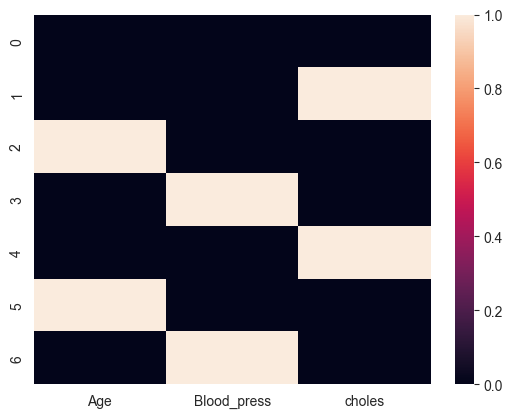

In [8]:
sns.heatmap(data.isna())
plt.show()

### **1. Remove (Row / Column)**

In [9]:
data_copy = data.copy()
data_copy

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,NaN,110.0,190.0
3,45.0,NaN,210.0
4,50.0,140.0,NaN
5,NaN,145.0,180.0
6,65.0,NaN,200.0


In [10]:
data_copy = data_copy.dropna()
data_copy

,Age,Blood_press,choles
0,25.0,120.0,200.0


In [12]:
data_copy = data.copy()
data_copy.dropna(subset=['Age'], inplace=True, ignore_index=True)
data_copy

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,45.0,NaN,210.0
3,50.0,140.0,NaN
4,65.0,NaN,200.0


In [13]:
data_copy = data.copy()
data_copy.dropna(subset=['Age', 'Blood_press'], inplace= True, ignore_index=True)
data_copy

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,50.0,140.0,NaN


In [23]:
data_copy = data.copy()
data_copy.drop('Age', axis=1, inplace=True)

In [24]:
data_copy

,Blood_press,choles
0,120.0,200.0
1,130.0,NaN
2,110.0,190.0
3,NaN,210.0
4,140.0,NaN
5,145.0,180.0
6,NaN,200.0



### **2. Imputation**


In [15]:
data.Age.value_counts()

Age
25.0    1
30.0    1
45.0    1
50.0    1
65.0    1
Name: count, dtype: int64

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
   # == data.fillna({'Age': data['Age'].mean()}, inplace=True)
data

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,43.0,110.0,190.0
3,45.0,NaN,210.0
4,50.0,140.0,NaN
5,43.0,145.0,180.0
6,65.0,NaN,200.0


In [18]:
data.fillna({'Blood_press': data.Blood_press.mean(), 'choles': 0}, inplace=True)
data

,Age,Blood_press,choles
0,25.0,120.0,200.0
1,30.0,130.0,0.0
2,43.0,110.0,190.0
3,45.0,129.0,210.0
4,50.0,140.0,0.0
5,43.0,145.0,180.0
6,65.0,129.0,200.0


In [19]:
data.isnull().sum()

Age            0
Blood_press    0
choles         0
dtype: int64

## **1.2 Dealing with Outliers**

In [25]:
df = pd.DataFrame({
    'values': [10, 12, 12, 13, 14, 14, 15, 16, 10000, 200]
})
df

,values
0,10
1,12
2,12
3,13
4,14
5,14
6,15
7,16
8,10000
9,200


### **1. Removing**

In [29]:
outliers = df[df['values'] > 99]
outliers

,values
8,10000
9,200


In [33]:
df.drop(outliers.index)   # ==  df = df[df['value'] <= 99]

,values
0,10
1,12
2,12
3,13
4,14
5,14
6,15
7,16


### **2. Z-score**

In [34]:
# z = (x - mean(x)) / std(x)
df['zscore'] = (df['values'] - df['values'].mean()) / df['values'].std()
df

,values,zscore
0,10,-0.323787
1,12,-0.323152
2,12,-0.323152
3,13,-0.322835
4,14,-0.322518
5,14,-0.322518
6,15,-0.322201
7,16,-0.321883
8,10000,2.845556
9,200,-0.263509


In [35]:
threshold = 2.5
outliers = df[df['zscore'].abs() > threshold]
outliers

,values,zscore
8,10000,2.845556


In [36]:
clean_data = df[np.abs(df['zscore']) <= threshold]
   # == clean_data = df.drop(outliers.index)
clean_data


,values,zscore
0,10,-0.323787
1,12,-0.323152
2,12,-0.323152
3,13,-0.322835
4,14,-0.322518
5,14,-0.322518
6,15,-0.322201
7,16,-0.321883
9,200,-0.263509


### **3. IQR**

In [37]:
df

,values,zscore
0,10,-0.323787
1,12,-0.323152
2,12,-0.323152
3,13,-0.322835
4,14,-0.322518
5,14,-0.322518
6,15,-0.322201
7,16,-0.321883
8,10000,2.845556
9,200,-0.263509


In [39]:
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
print(Q1, Q3)

12.25 15.75


In [40]:
IQR = Q3 - Q1
IQR

np.float64(3.5)

In [42]:
mymin = Q1 - 1.5 * IQR
mymax = Q3 + 1.5 * IQR
print(mymin, mymax)

7.0 21.0


In [43]:
outliers = df[(df['values'] < mymin) | (df['values'] > mymax)]
outliers

,values,zscore
8,10000,2.845556
9,200,-0.263509


In [44]:
clean_data= df.drop(outliers.index)
clean_data

,values,zscore
0,10,-0.323787
1,12,-0.323152
2,12,-0.323152
3,13,-0.322835
4,14,-0.322518
5,14,-0.322518
6,15,-0.322201
7,16,-0.321883


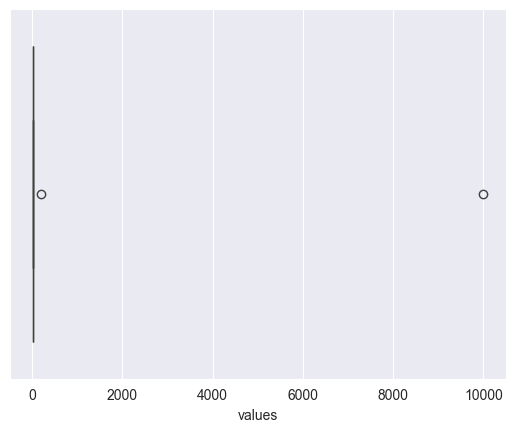

In [45]:
sns.boxplot(df, x='values')
plt.show()

In [62]:
sns.boxplot(clean_data, x='values')
plt.show()

NameError: name 'clean_data' is not defined

## **1.3 Dealing with Duplicates**

In [47]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [48]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [49]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [50]:
data.drop_duplicates(subset=["k1"])   # حذف كل القيم المكرره من العمود K1

,k1,k2
0,one,1
1,two,1


In [51]:
data.drop_duplicates(["k1", "k2"], keep="last")
# احذف الكيم اللي تتكرر في K1 and K2 مع بعض سيب اخر نسخه

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


# **2️⃣ Data Transformation**

## **2.1 Converting data types**

### 1. Extension Data Types

In [7]:
# Series من Integers فيها Missing Value
s = pd.Series([1, 2, 3, None])
print(s)

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64


In [6]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
print(s)                   # "Int64" =  pd.Int64Dtype()

0       1
1       2
2       3
3    <NA>
dtype: Int64


In [5]:
s = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

In [8]:
df = pd.DataFrame({
    "A": [1, 2, None, 4],
    "B": ["one", "two", "three", None],
    "C": [False, None, False, True]
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      object 
 2   C       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [9]:
df["A"] = df["A"].astype("Int64")
df["B"] = df["B"].astype("string")
df["C"] = df["C"].astype("boolean")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      Int64  
 1   B       3 non-null      string 
 2   C       3 non-null      boolean
dtypes: Int64(1), boolean(1), string(1)
memory usage: 208.0 bytes


In [10]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


### 2. Bad characters

In [15]:
data = {
    "OrderID": [1, 2, 3],
    "Revenue": ["$1000", "$1500", "$2000"],
    'Price': ['1,000', '1,500', '2,000'],
    "Quantity": [5, 3, 8]
}
df = pd.DataFrame(data)
df

,OrderID,Revenue,Price,Quantity
0,1,$1000,"1,000",5
1,2,$1500,"1,500",3
2,3,$2000,"2,000",8


In [16]:
df.dtypes

OrderID      int64
Revenue     object
Price       object
Quantity     int64
dtype: object

In [20]:
print(df["Revenue"].sum())
print(df['Price'].sum())

$1000$1500$2000
1,0001,5002,000


In [21]:
df["Revenue"] = df["Revenue"].str.strip("$").astype(int)
# Remove "$" then convert to int

In [23]:
df["Price"] = df["Price"].str.replace(',', '').astype(int)

In [24]:
df

,OrderID,Revenue,Price,Quantity
0,1,1000,1000,5
1,2,1500,1500,3
2,3,2000,2000,8


In [25]:
df.dtypes

OrderID     int64
Revenue     int64
Price       int64
Quantity    int64
dtype: object

In [17]:
df["Revenue"].sum()

np.int64(4500)

### 4. Mask

In [1]:
import pandas as pd

df = pd.DataFrame({
    'Country': ['Egypt', 'Saudi Arabia', 'Algeria', 'Morocco',
                'Iraq', 'Sudan', 'Egypt', 'Morocco',
                'Iraq', 'Sudan', 'Egypt', 'Morocco'],
    'pop': [116_000_000, 36_000_000, 46_000_000, 38_000_000,
            46_000_000, 49_000_000, 116_000_000, 38_000_000,
            46_000_000, 49_000_000, 116_000_000, 38_000_000]
})

df

,Country,pop
0,Egypt,116000000
1,Saudi Arabia,36000000
2,Algeria,46000000
3,Morocco,38000000
4,Iraq,46000000
5,Sudan,49000000
6,Egypt,116000000
7,Morocco,38000000
8,Iraq,46000000
9,Sudan,49000000


In [3]:
counts = df['Country'].value_counts()
counts

Country
Egypt           3
Morocco         3
Sudan           2
Iraq            2
Saudi Arabia    1
Algeria         1
Name: count, dtype: int64

In [4]:
counts[counts < 2]

Country
Saudi Arabia    1
Algeria         1
Name: count, dtype: int64

In [5]:
mask = df['Country'].isin(counts[counts < 2].index)

In [6]:
df['Country_limited'] = df['Country'].where(~mask, 'Other')

In [7]:
df

,Country,pop,Country_limited
0,Egypt,116000000,Egypt
1,Saudi Arabia,36000000,Other
2,Algeria,46000000,Other
3,Morocco,38000000,Morocco
4,Iraq,46000000,Iraq
5,Sudan,49000000,Sudan
6,Egypt,116000000,Egypt
7,Morocco,38000000,Morocco
8,Iraq,46000000,Iraq
9,Sudan,49000000,Sudan


### 2. Date Example

In [18]:
import datetime as dt

today = dt.datetime.today()

subs = {
    "User": ["Ibrahim", "Sara", "Amr"],
    "subscription_date": ["2023-05-10", "2025-12-01", "2024-06-15"]
    # واحدة في المستقبل
}
df = pd.DataFrame(subs)
df

,User,subscription_date
0,Ibrahim,2023-05-10
1,Sara,2025-12-01
2,Amr,2024-06-15


In [19]:
df.dtypes

User                 object
subscription_date    object
dtype: object

In [20]:
df['subscription_date'] = pd.to_datetime(df['subscription_date'])
df.dtypes

User                         object
subscription_date    datetime64[ns]
dtype: object

In [21]:
outliers = df[df["subscription_date"] > today ]
outliers

,User,subscription_date
1,Sara,2025-12-01


In [22]:
df.drop(outliers.index , inplace = True)
assert df["subscription_date"].max() <= today
df

,User,subscription_date
0,Ibrahim,2023-05-10
2,Amr,2024-06-15


In [23]:
day = df['subscription_date'].dt.day
print(day)

0    10
2    15
Name: subscription_date, dtype: int32


## **2.2 Encoding categorical data**

### 1. Label Encoding ( ordinal )

In [25]:
Store = pd.DataFrame({
    'size':['XL' , 'L' , 'M' , 'S' ,'L' , 'M' , 'S'],
    'price':[120 , 250 , 140 , 260 , 546 , 567 , 234]
})
Store

,size,price
0,XL,120
1,L,250
2,M,140
3,S,260
4,L,546
5,M,567
6,S,234


#### Mapping

In [38]:

# S -> 1 , M -> 2 , L -> 3 , XL ->4
size_mapping = {
    's' : 1,
    "M" : 2,
    'L' : 3,
    'XL' : 4
}

In [41]:
Store['size_encoding'] = Store['size'].map(size_mapping)

# map لو القيمه مش موجوده هيحط NaN

In [35]:
Store

,size,price,size_encoding
0,XL,120,4
1,L,250,3
2,M,140,2
3,S,260,1
4,L,546,3
5,M,567,2
6,S,234,1


#### replace

In [39]:
Store['size_encoding_2']=Store['size'].replace(size_mapping)

# replace لو في قيمه مش موجوده هيحط القيمه الاصليه S

In [40]:
Store

,size,price,size_encoding,size_encoding_2
0,XL,120,4,4
1,L,250,3,3
2,M,140,2,2
3,S,260,1,S
4,L,546,3,3
5,M,567,2,2
6,S,234,1,S


#### sklearn

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
Store = pd.DataFrame({
    'size':['XL' , 'L' , 'M' , 'S' ,'L' , 'M' , 'S'],
    'price':[120 , 250 , 140 , 260 , 546 , 567 , 234]
})

In [8]:
# create instance
encoder = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL']])

# fit -> mapping
encoder.fit(Store[['size']])

# transformation
Store['size_encoding']=encoder.transform(Store[['size']])

In [9]:
Store

,size,price,size_encoding
0,XL,120,3.0
1,L,250,2.0
2,M,140,1.0
3,S,260,0.0
4,L,546,2.0
5,M,567,1.0
6,S,234,0.0


In [10]:
# create instance
encoder = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL']])

# fit_transform
Store['size_encoding_2'] = encoder.fit_transform(Store[['size']])

In [11]:
Store

,size,price,size_encoding,size_encoding_2
0,XL,120,3.0,3.0
1,L,250,2.0,2.0
2,M,140,1.0,1.0
3,S,260,0.0,0.0
4,L,546,2.0,2.0
5,M,567,1.0,1.0
6,S,234,0.0,0.0


#### Nomnial

In [16]:
Store_2 = pd.DataFrame({
    'color':['red' , 'green' , 'blue' , 'yellow' ,'black' , 'white' , 'skyblue'],
    'price':[120 , 250 , 140 , 260 , 546 , 567 , 234]
})

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encode = LabelEncoder()

Store_2['color_encoding'] = encode.fit_transform(Store_2['color'])

In [18]:
Store_2

,color,price,color_encoding
0,red,120,3
1,green,250,2
2,blue,140,1
3,yellow,260,6
4,black,546,0
5,white,567,5
6,skyblue,234,4


### 2. one-Hot Encoding

In [19]:
Store_2 = pd.DataFrame({
    'color':['red' , 'green' , 'blue' , 'yellow' ,'black' , 'white' , 'skyblue' , 'red' , 'blue'],
    'price':[120 , 250 , 140 , 260 , 546 , 567 , 234 , 180 , 170]
})

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder_1 =OneHotEncoder(sparse_output=False)
color_encoding = encoder_1.fit_transform(Store_2[['color']])

In [22]:
color_encoding

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [23]:
encoder_1.get_feature_names_out(['color'])

array(['color_black', 'color_blue', 'color_green', 'color_red',
       'color_skyblue', 'color_white', 'color_yellow'], dtype=object)

In [25]:
store_encoding = pd.DataFrame(color_encoding , columns=encoder_1.get_feature_names_out(['color']) )

In [26]:
store_encoding

,color_black,color_blue,color_green,color_red,color_skyblue,color_white,color_yellow
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **2.3 Feature Scaling**

| التقنية            | الفكرة                                 | النطاق الجديد | الميزة                        | العيب                             |
| ------------------ | -------------------------------------- | ------------- | ----------------------------- | --------------------------------- |
| Min-Max Scaling    | إعادة توزيع القيم بين 0 و 1            | \[0, 1]       | يحافظ على التوزيع             | حساس للقيم المتطرفة               |
| Standardization    | تحويل القيم لعدد الانحرافات عن المتوسط | غير محدود     | مناسب للتوزيعات المختلفة      | مالوش حدود (ممكن قيم كبيرة/سالبة) |
| Log Transformation | تقليل الالتواء (Skewness)              | حسب الـ log   | يقلل تأثير القيم الكبيرة جدًا | لازم القيم تكون موجبة             |


In [8]:
data = pd.DataFrame({
    'Age': [25, 30, 35, 45, 50, 55, 65],
    'Blood_press': [120, 130, 110, 130, 140, 145, 160],
    'choles': [200, 150, 190, 210, 30, 180, 200]
})
data

,Age,Blood_press,choles
0,25,120,200
1,30,130,150
2,35,110,190
3,45,130,210
4,50,140,30
5,55,145,180
6,65,160,200


In [9]:
data.describe()

,Age,Blood_press,choles
count,7.000000,7.000000,7.000000
mean,43.571429,133.571429,165.714286
std,14.351041,16.511179,62.943663
min,25.000000,110.000000,30.000000
25%,32.500000,125.000000,165.000000
50%,45.000000,130.000000,190.000000
75%,52.500000,142.500000,200.000000
max,65.000000,160.000000,210.000000


#### **Normalization**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(data)
norm_data

array([[0.        , 0.2       , 0.94444444],
       [0.125     , 0.4       , 0.66666667],
       [0.25      , 0.        , 0.88888889],
       [0.5       , 0.4       , 1.        ],
       [0.625     , 0.6       , 0.        ],
       [0.75      , 0.7       , 0.83333333],
       [1.        , 1.        , 0.94444444]])

In [12]:
norm_data = pd.DataFrame(norm_data, columns=[data.columns])
norm_data

,Age,Blood_press,choles
0,0.000,0.2,0.944444
1,0.125,0.4,0.666667
2,0.250,0.0,0.888889
3,0.500,0.4,1.000000
4,0.625,0.6,0.000000
5,0.750,0.7,0.833333
6,1.000,1.0,0.944444


In [13]:
norm_data['choles'] = round(norm_data['choles'])

In [14]:
norm_data

,Age,Blood_press,choles
0,0.000,0.2,1.0
1,0.125,0.4,1.0
2,0.250,0.0,1.0
3,0.500,0.4,1.0
4,0.625,0.6,0.0
5,0.750,0.7,1.0
6,1.000,1.0,1.0


In [32]:
norm_data.describe()

,Age,Blood_press,choles
count,7.000000,7.000000,7.000000
mean,0.464286,0.471429,0.753968
std,0.358776,0.330224,0.349687
min,0.000000,0.000000,0.000000
25%,0.187500,0.300000,0.750000
50%,0.500000,0.400000,0.888889
75%,0.687500,0.650000,0.944444
max,1.000000,1.000000,1.000000


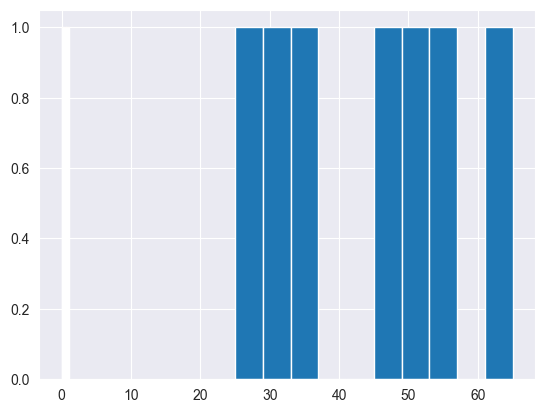

In [42]:
plt.hist(data['Age'])
plt.hist(norm_data['Age'])
plt.show()

#### Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

# z-score = ( x - mean(x)) / std(x)

In [35]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)
print(std_data)

[[-1.39776866 -0.8878117   0.58834841]
 [-1.02144633 -0.23363466 -0.26965969]
 [-0.645124   -1.54198873  0.41674679]
 [ 0.10752067 -0.23363466  0.75995002]
 [ 0.483843    0.42054238 -2.3288791 ]
 [ 0.86016533  0.7476309   0.24514517]
 [ 1.61280999  1.72889646  0.58834841]]


In [36]:
std_data = pd.DataFrame(std_data, columns= [data.columns])
std_data

,Age,Blood_press,choles
0,-1.397769,-0.887812,0.588348
1,-1.021446,-0.233635,-0.269660
2,-0.645124,-1.541989,0.416747
3,0.107521,-0.233635,0.759950
4,0.483843,0.420542,-2.328879
5,0.860165,0.747631,0.245145
6,1.612810,1.728896,0.588348


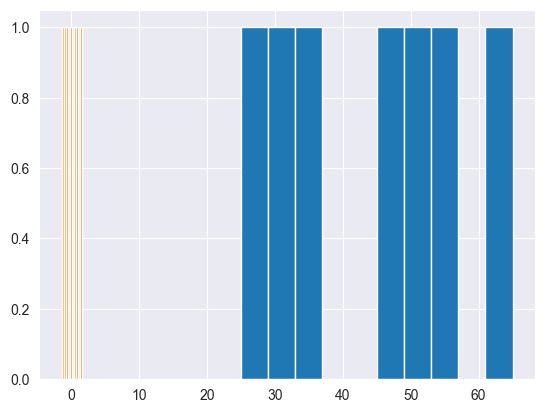

In [37]:
plt.hist(data['Age'])
plt.hist(std_data['Age'])
plt.show()

#### Log Transformation

In [27]:
data = pd.DataFrame({
    'Age': [25, 30, 35, 45, 50, 55, 65],
    'Blood_press': [120, 130, 110, 130, 140, 145, 160],
    'choles': [200, 150, 190, 210, 30, 180, 200]
})
data

,Age,Blood_press,choles
0,25,120,200
1,30,130,150
2,35,110,190
3,45,130,210
4,50,140,30
5,55,145,180
6,65,160,200


In [26]:
from sklearn.preprocessing import PowerTransformer

In [28]:
scaler = PowerTransformer(method='yeo-johnson')  # يشمل log transformation
log_transformed = scaler.fit_transform(data)

In [30]:
log_transformed

array([[-1.49948579, -0.8793517 ,  0.68726978],
       [-1.02372233, -0.18479628, -0.74831791],
       [-0.58895592, -1.62819517,  0.34913098],
       [ 0.18930774, -0.18479628,  1.05242993],
       [ 0.54313702,  0.46312927, -2.06505458],
       [ 0.87817175,  0.77156824,  0.03727204],
       [ 1.50154753,  1.64244193,  0.68726978]])

In [31]:
log_data = pd.DataFrame(log_transformed, columns= [data.columns])
log_data

,Age,Blood_press,choles
0,-1.499486,-0.879352,0.687270
1,-1.023722,-0.184796,-0.748318
2,-0.588956,-1.628195,0.349131
3,0.189308,-0.184796,1.052430
4,0.543137,0.463129,-2.065055
5,0.878172,0.771568,0.037272
6,1.501548,1.642442,0.687270


 # **3️⃣ Handle Imbalance Data**


In [3]:
data =  pd.read_csv(r'aug_train.csv')

In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [6]:
# check missing values
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
data[data.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [8]:
# encoding
data['Gender'].value_counts()

Gender
Male      205603
Female    176551
Name: count, dtype: int64

In [9]:
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: count, dtype: int64

In [10]:
data['Vehicle_Damage'].value_counts()

Vehicle_Damage
No     198501
Yes    183653
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = encoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = encoder.fit_transform(data['Vehicle_Damage'])

In [12]:
data.drop(columns=['id'], inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                382154 non-null  int64  
 1   Age                   382154 non-null  int64  
 2   Driving_License       382154 non-null  int64  
 3   Region_Code           382154 non-null  float64
 4   Previously_Insured    382154 non-null  int64  
 5   Vehicle_Age           382154 non-null  int64  
 6   Vehicle_Damage        382154 non-null  int64  
 7   Annual_Premium        382154 non-null  float64
 8   Policy_Sales_Channel  382154 non-null  float64
 9   Vintage               382154 non-null  int64  
 10  Response              382154 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.1 MB


In [14]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [16]:
# split data into features & target
features = data.drop('Response', axis=1)
target = data['Response']

In [17]:
target.value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

## **1. OverSampling**

### **Random OverSampling**

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
over_sampler = RandomOverSampler(sampling_strategy='minority')

In [26]:
x_over , y_over = over_sampler.fit_resample(features, target)

In [27]:
x_over

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,22,1,7.0,1,1,0,2630.0,152.0,16
1,1,42,1,28.0,0,0,1,43327.0,26.0,135
2,0,66,1,33.0,0,0,1,35841.0,124.0,253
3,0,22,1,33.0,0,1,0,27645.0,152.0,69
4,1,28,1,46.0,1,1,0,29023.0,152.0,211
...,...,...,...,...,...,...,...,...,...,...
639101,1,41,1,29.0,0,0,1,2630.0,156.0,277
639102,1,31,1,28.0,0,1,1,31527.0,152.0,165
639103,0,53,1,3.0,0,0,1,2630.0,26.0,214
639104,0,47,1,28.0,0,0,1,39331.0,26.0,240


In [28]:
y_over.value_counts()

Response
0    319553
1    319553
Name: count, dtype: int64

### **SMOTE**

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE()

In [34]:
x_smote , y_smote = sm.fit_resample(features, target)

In [37]:
y_smote.value_counts()

Response
0    319553
1    319553
Name: count, dtype: int64

## **2. UnderSampling**

### Random UnderSampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
under_sampler = RandomUnderSampler(sampling_strategy='majority')

In [29]:
x_under , y_under = under_sampler.fit_resample(features, target)

In [30]:
x_under

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
14236,1,69,1,7.0,0,0,1,46858.0,30.0,264
318335,0,50,1,28.0,1,0,0,31468.0,55.0,130
131671,0,55,1,28.0,0,0,1,49072.0,26.0,138
336287,1,25,1,50.0,1,1,0,22406.0,152.0,296
342784,0,21,1,30.0,1,1,0,36701.0,152.0,169
...,...,...,...,...,...,...,...,...,...,...
382106,0,46,1,8.0,0,0,1,68063.0,26.0,100
382116,0,39,1,28.0,0,0,1,27348.0,35.0,142
382137,1,39,1,46.0,0,0,1,23926.0,124.0,97
382143,1,54,1,28.0,0,0,1,37138.0,26.0,276


In [31]:
y_under.value_counts()

Response
0    62601
1    62601
Name: count, dtype: int64

# **4️⃣ Feature Selection and Engineering**

## **1. Creating Features**

In [35]:
df =  pd.read_csv(r'aug_train.csv')

In [36]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [38]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [40]:
categorical_df = df.select_dtypes(include= 'object')
categorical_df.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [44]:
categorical_df

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,< 1 Year,No
1,Male,1-2 Year,Yes
2,Female,1-2 Year,Yes
3,Female,< 1 Year,No
4,Male,< 1 Year,No
...,...,...,...
382149,Male,< 1 Year,Yes
382150,Male,< 1 Year,No
382151,Male,1-2 Year,Yes
382152,Female,< 1 Year,No


### **Dealing with categorical features**

In [42]:
categorical_df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
encoder1 = OrdinalEncoder(categories=[['Female', 'Male']])
encoder2 = OrdinalEncoder(categories=[['No', 'Yes']])
encoder3 = OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

df['En_Gender'] = encoder1.fit_transform(df[['Gender']])
df['En_Vehicle_Damage'] = encoder2.fit_transform(df[['Vehicle_Damage']])
df['En_Vehicle_Age'] = encoder3.fit_transform(df[['Vehicle_Age']])


In [47]:
df.drop('id', axis=1, inplace=True)

In [48]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,En_Gender,En_Vehicle_Damage,En_Vehicle_Age
0,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0,1.0,0.0,0.0
1,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0,1.0,1.0,1.0
2,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0,0.0,1.0,1.0
3,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0,0.0,0.0,0.0
4,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0,1.0,0.0,0.0


In [50]:
import pandas as pd

df = pd.DataFrame({
    'Country': ['USA', 'India', 'France', 'USA', 'Egypt', 'India', 'Germany', 'Egypt']
})

display(df)


counts = df['Country'].value_counts()
mask = df['Country'].isin(counts[counts < 2].index)
df['Country_limited'] = df['Country'].where(~mask, 'Other')


display(df)


,Country
0,USA
1,India
2,France
3,USA
4,Egypt
5,India
6,Germany
7,Egypt


,Country,Country_limited
0,USA,USA
1,India,India
2,France,Other
3,USA,USA
4,Egypt,Egypt
5,India,India
6,Germany,Other
7,Egypt,Egypt


### **Numeric variables**

#### **❓ Does size matter?**

🔹 مثال: بيانات عن مطاعم وعدد مخالفات السلامة الصحية

مطعم بدون مخالفات = ممتاز 👌

مطعم عنده 1 أو 5 مخالفات → أنت أصلاً مش عايز تروح هناك.


####  **0/1 Binarizing**

نعمل عمود جديد اسمه Binary_Violation:

مطاعم بدون مخالفات = 0

مطاعم فيها أي مخالفة = 1



In [51]:
import pandas as pd

df = pd.DataFrame({
    'Restaurant_ID': [1, 2, 3, 4, 5],
    'Number_of_Violations': [0, 1, 2, 5, 0]
})

In [53]:
# Binarization
df['Binary_Violation'] = 0
df.loc[df['Number_of_Violations'] > 0, 'Binary_Violation'] = 1
df

,Restaurant_ID,Number_of_Violations,Binary_Violation
0,1,0,0
1,2,1,1
2,3,2,1
3,4,5,1
4,5,0,0


#### **📦 Binning numeric variables – تقسيم الأرقام إلى فئات**

Group 1: بدون مخالفات

Group 2: مخالفة أو 2

Group 3: 3 مخالفات أو أكثر

📌 نستخدم الدالة pd.cut() علشان نحدد الـ bins.


(−∞ , 0] → Group 1

(0 , 2] → Group 2

(2 , ∞) → Group 3

In [54]:
# Binning
df['Violation_Group'] = pd.cut(
    df['Number_of_Violations'],
    bins=[-1, 0, 2, float('inf')],
    labels=['Group 1: No violations',
            'Group 2: 1-2 violations',
            'Group 3: 3+ violations']
)
df

,Restaurant_ID,Number_of_Violations,Binary_Violation,Violation_Group
0,1,0,0,Group 1: No violations
1,2,1,1,Group 2: 1-2 violations
2,3,2,1,Group 2: 1-2 violations
3,4,5,1,Group 3: 3+ violations
4,5,0,0,Group 1: No violations


## **2. Dealing with Text Data**

### **Text Encoding**

In [56]:
import pandas as pd

speech_df = pd.DataFrame({
    "text": [
        "Fellow-Citizens: I am again called upon by the voice of my Country...",
        "We are met on a great battlefield of that war."
    ]
})
speech_df

,text
0,Fellow-Citizens: I am again called upon by the...
1,We are met on a great battlefield of that war.


In [59]:
#  Removing unwanted characters – إزالة الرموز الغير مرغوبة
speech_df["text"] = speech_df["text"].str.replace("[^a-zA-Z]", " ", regex=True)
speech_df

,text
0,Fellow Citizens I am again called upon by the...
1,We are met on a great battlefield of that war


In [61]:
# Standardize the case – توحيد حالة الحروف
speech_df["text"] = speech_df["text"].str.lower()
speech_df

,text
0,fellow citizens i am again called upon by the...
1,we are met on a great battlefield of that war


In [64]:
# Length of text – طول النص
speech_df["char_count"] = speech_df["text"].str.len()
speech_df

,text,char_count
0,fellow citizens i am again called upon by the...,69
1,we are met on a great battlefield of that war,46


In [65]:
# Word counts – عدد الكلمات
speech_df["word_count"] = speech_df["text"].str.split().str.len()
speech_df

,text,char_count,word_count
0,fellow citizens i am again called upon by the...,69,13
1,we are met on a great battlefield of that war,46,10


In [69]:
# Average word length – متوسط طول الكلمة
speech_df["Avg_word_length"] = speech_df['char_count'] / speech_df['word_count']
speech_df

,text,char_count,word_count,Avg_word_length
0,fellow citizens i am again called upon by the...,69,13,5.307692
1,we are met on a great battlefield of that war,46,10,4.600000


In [33]:
import pandas as pd

speech_df = pd.DataFrame({
    "text": [
        "Fellow-Citizens: I am again called upon by the voice of my Country...",
        "We are met on a great battlefield of that war."
    ]
})

# تنظيف النصوص
speech_df["clean_text"] = speech_df["text"].str.replace("[^a-zA-Z]", " ", regex=True).str.lower()

# طول النص
speech_df["char_count"] = speech_df["clean_text"].str.len()

# عدد الكلمات
speech_df["word_count"] = speech_df["clean_text"].str.split().str.len()

# متوسط طول الكلمة
speech_df["avg_word_len"] = speech_df["char_count"] / speech_df["word_count"]

speech_df


,text,clean_text,char_count,word_count,avg_word_len
0,Fellow-Citizens: I am again called upon by the...,fellow citizens i am again called upon by the...,69,13,5.307692
1,We are met on a great battlefield of that war.,we are met on a great battlefield of that war,46,10,4.600000


#### **Word Count**

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [73]:
data = {
    "text": [
        "of the people by the people of the nation",
        "the power of the people is strong",
        "people love their nation"
    ]
}
df = pd.DataFrame(data)
df

,text
0,of the people by the people of the nation
1,the power of the people is strong
2,people love their nation


In [75]:
cv = CountVectorizer()
X = cv.fit_transform(df["text"])

In [77]:
word_counts = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
word_counts = word_counts.add_prefix("Counts_")

In [79]:
df_new = pd.concat([df, word_counts], axis=1)
df_new

,text,Counts_by,Counts_is,Counts_love,Counts_nation,Counts_of,Counts_people,Counts_power,Counts_strong,Counts_the,Counts_their
0,of the people by the people of the nation,1,0,0,1,2,2,0,0,3,0
1,the power of the people is strong,0,1,0,0,1,1,1,1,2,0
2,people love their nation,0,0,1,1,0,1,0,0,0,1


# **5️⃣ Data Splitting**

In [40]:
df =  pd.read_csv(r'aug_train.csv')

In [41]:
label = df['Response']                    # target & y
features = df.drop('Response', axis= 1)

print(label.shape, features.shape)

(382154,) (382154, 11)


In [42]:
label.value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

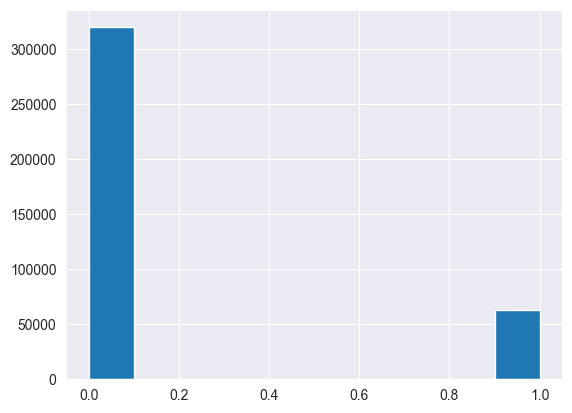

In [43]:
plt.hist(label)
plt.show()